**Assignment** **1-Neural Networks**

*Classification of Movie Reviews: A binary Classification Problem*

**Problem Statement:**
Using Neural Networks, classify a movie review as either a Positive review or a negative review. 

In [ ]:
#Loading the IMDB Dataset

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])


In [ ]:
#Decoding reviews back to text

# step 1: Load the mappings of the dictionary from the word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to integer mapping 
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# step 3: Decode the review, mapping integer to words
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Preparing the data:**

Multi-hot encoding is being used to convert the lists into vectors of 0s and 1s. Dimension is set to 10000 representing each review by a 10000-dimensional vector.





In [ ]:
#Encoding the integer sequences via multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building the Model:**

*Architecture of the Model:* 

1.   We are using Keras library for this classification problem.
2.   First 2 hidden layers has 16 nodes in each layer with an activation function of **ReLU**( activation function is changed to **tanh** to observe as to how different activation function changes the accuracy of the Validation and the test set).
3. Third layer is the output layer which uses a sigmoid function.














In [ ]:
#Model Definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model:**

The following functions are used to compile the model:


* rmsprop optimizer is used.
* Loss function is binary_crossentropy as it is a binary classification problem.
* The measure of performance is Accuracy.






In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


**Partitioning the data into Training and Validation set:**

A part of the data is being set aside to validate the performance of the model. Validation is set is used in tuning the hyperparameters while finding the optimal value. We usually adjust the value of the hyperparameter in training set and check the model's performance on the validation set.This adjusting of hyperparameter is done until the maximum accuracy is attained. (In our case, we are estimating the model's performance by Accuracy),

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the Model:**

Initially, we are training the model in batches of 20(epochs) with 512 samples. Later on, based on the loss function and accuracy, these number of epochs is changed.

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 80ms/step - loss: 0.5035 - accuracy: 0.7911 - val_loss: 0.3763 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2974 - accuracy: 0.8975 - val_loss: 0.3051 - val_accuracy: 0.8756
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2166 - accuracy: 0.9209 - val_loss: 0.2811 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1715 - accuracy: 0.9405 - val_loss: 0.2761 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1350 - accuracy: 0.9546 - val_loss: 0.2906 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1099 - accuracy: 0.9631 - val_loss: 0.3402 - val_accuracy: 0.8736
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0893 - accuracy: 0.9711 - val_loss: 0.3517 - val_accuracy: 0.8756
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

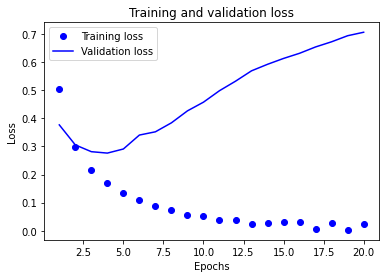

In [ ]:
#Plotting the Validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

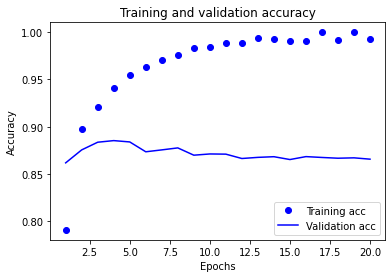

In [ ]:
#Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plots,

We can observe that the minimum validation loss and maximum accuracy is obtained nearly at 2 epochs(less than 2.5 according to the plots.)
After 2.5 epochs, the accuracy on the training data is improving whereas the accuracy on the Validation data is decreasing. This means that after 2.5 epochs, model is overfitted.


To decrease model's overfitting, 2 epochs is chosen as optimal number of epochs.

In [ ]:
#Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/2
30/30 [==============================] - 2s 78ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.7246 - val_accuracy: 0.8655
Epoch 2/2
30/30 [==============================] - 1s 41ms/step - loss: 0.0251 - accuracy: 0.9936 - val_loss: 0.7417 - val_accuracy: 0.8654


The accuracy of the model on Validation set is 86.55 and 86.54 on each epoch respectively.

In [ ]:
#Testing on test data

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="tanh"),
        layers.Dense(16, activation="tanh"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/2
49/49 [==============================] - 3s 32ms/step - loss: 0.4489 - accuracy: 0.8248
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.2871 - accuracy: 0.8834


[0.2871164381504059, 0.883400022983551]

After deploying the model on the Test data(unseen data), accuracy is recorded to be 88.34

**Dropout technique:**

In order to improve the accuracy of the model on Validation data and Test data, Dropout technique is being implemented.

In this technique, one dropout layer is added having only 10% of dropout value. This percentage of dropout value will randomly drop out 10% of nodes in between the layers so that the model only captures the prominent features and ignores noise,(if any).

The number of nodes is set to be 20 in each layer after experimenting with multiple number of nodes(16,32,64,128 etc) as the accuracy is noticed to be better at 20 nodes. Similarly, I examined the model's performance with fewer and more number of nodes (results are shared in the summary sheet/reports).

I used both ReLU and tanh activation functions for better performance of the model.

In [ ]:
#Dropouts

from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import models

dpt_model = models.Sequential()

dpt_model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.1))
dpt_model.add(layers.Dense(20, activation='tanh', input_shape=(10000,)))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#Re-training the model on 2 epochs after implemting Dropout technique:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/2
30/30 [==============================] - 2s 62ms/step - loss: 0.1422 - accuracy: 0.9558 - val_loss: 0.1465 - val_accuracy: 0.9504
Epoch 2/2
30/30 [==============================] - 1s 38ms/step - loss: 0.0948 - accuracy: 0.9774 - val_loss: 0.1692 - val_accuracy: 0.9390


After using the Dropout technique, there is a significant improvement in the validation accuracy which is 95.04 and 93.90 on each of the epoch. This shows an approximate improvement of 6% after using Dropout technique.

In [ ]:
#Retesting the model:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="tanh"),
        layers.Dense(16, activation="tanh"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results


Epoch 1/2
49/49 [==============================] - 4s 31ms/step - loss: 0.4710 - accuracy: 0.8144
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.2818 - accuracy: 0.8861


[0.2818344831466675, 0.8861200213432312]

After using Dropout technique, we can see that the accuracy is improved to 88.61 from 88.34.